# Deep Learning


### Neural Networks
A neural network is composed of layers, each containing neurons or units as they are called nowadays, see image. The goal in Deep Learning is to create powerful models that learn features in the input data. A neural network is a function composition of layers.


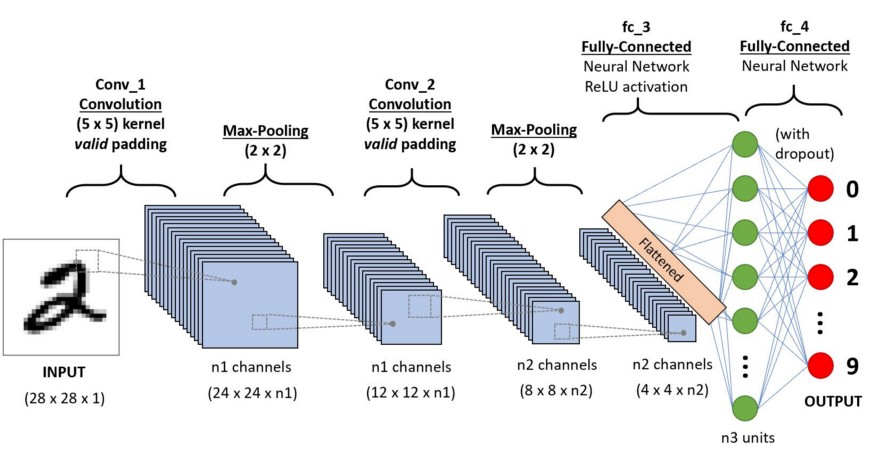

In [1]:
from IPython.display import Image
Image(filename="figures/complete_cnn.jpeg")

## Convolutional Neural Networks
In computer vision convolutional neural networks are used for example in image classification, object detection, image captioning and semantic segmentation among other things. 

The principal components in an CNN are:
* convolution layers
* max or average pooling
* full connected layers



### Convolutional layer

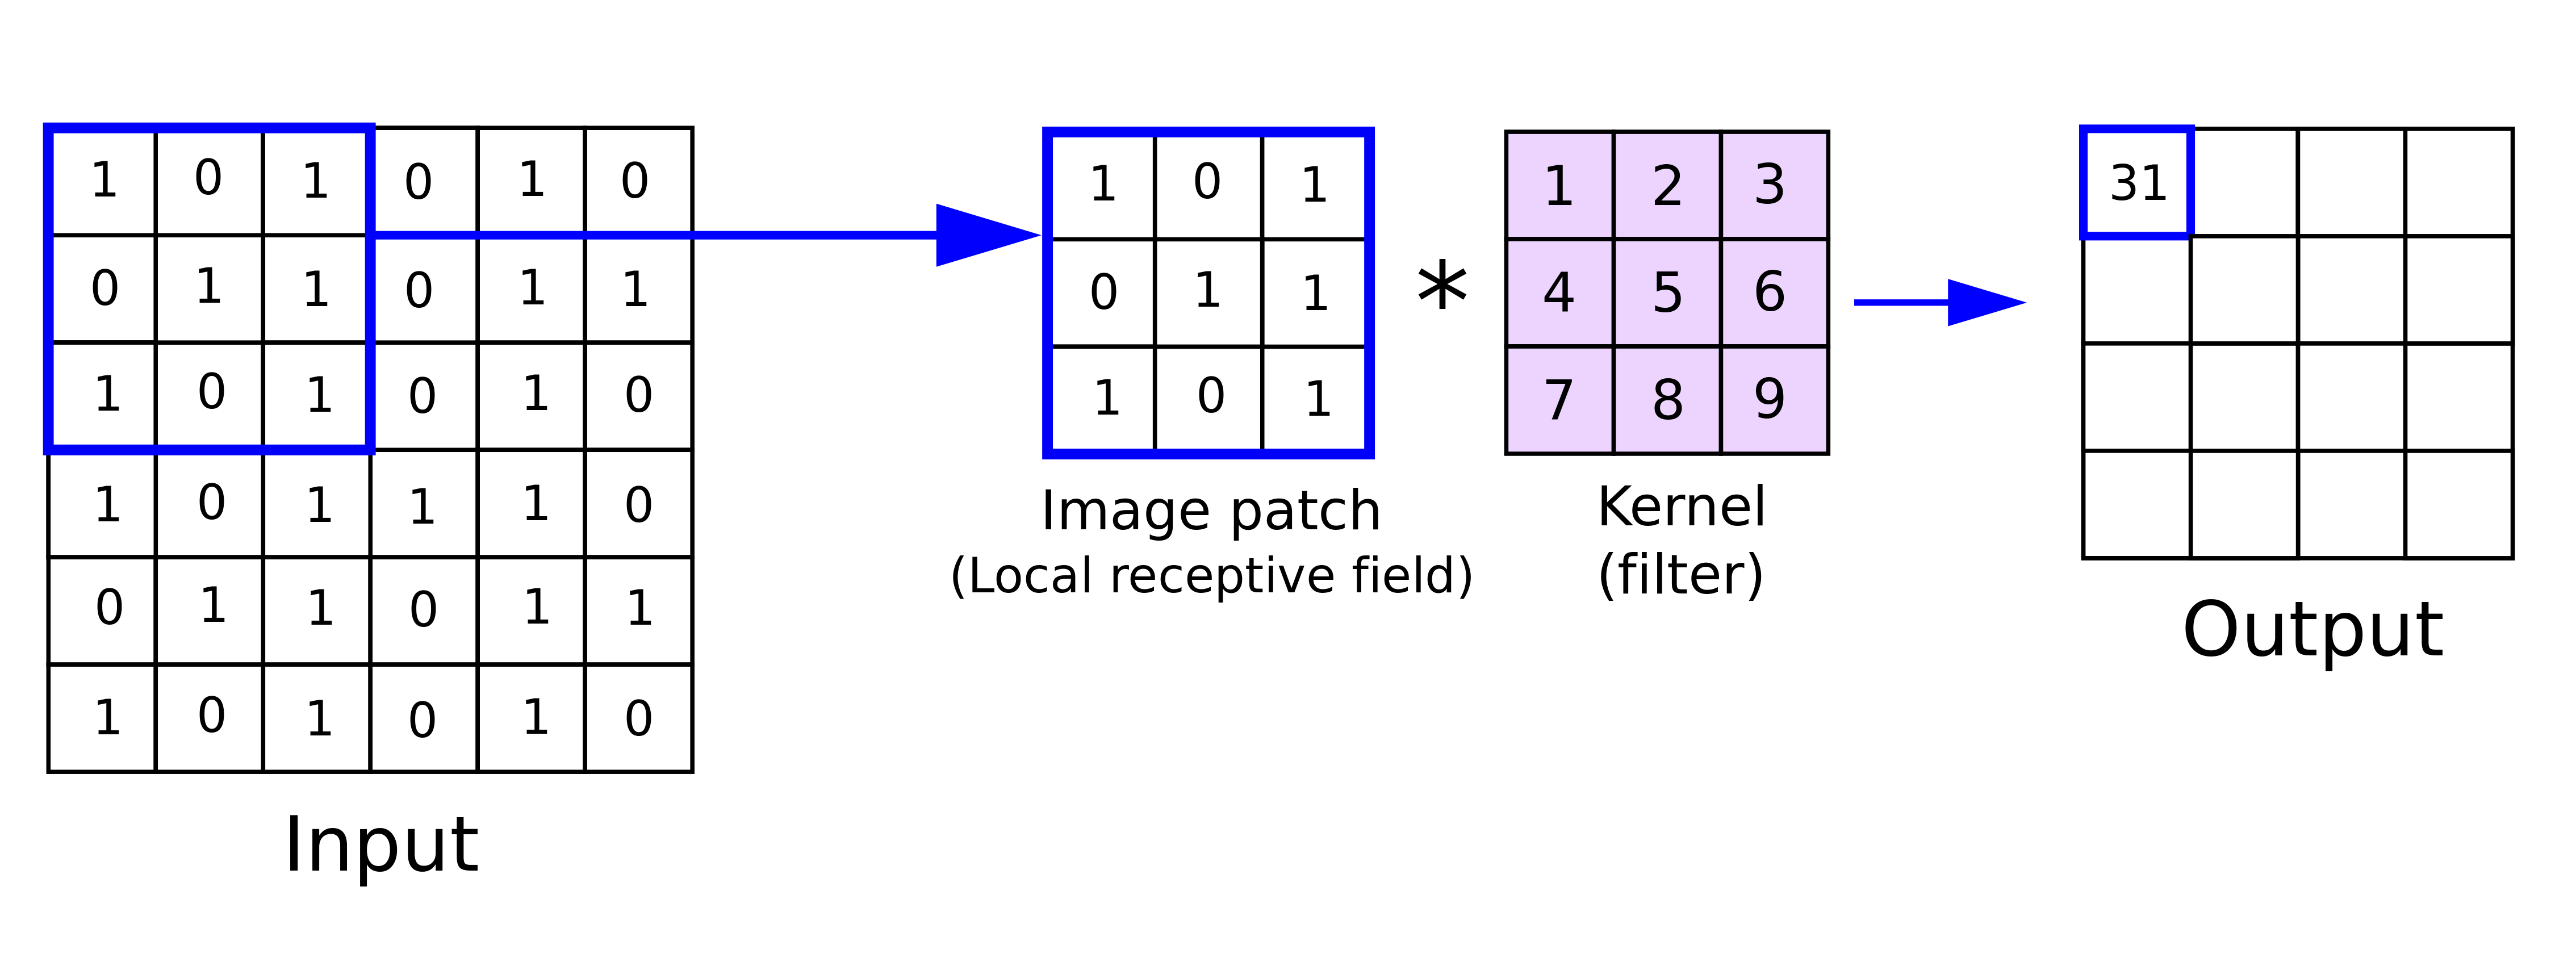

In [2]:
Image(filename="figures/convolution.png")

In [3]:
import tensorflow as tf
from functools import partial
from tensorflow import keras
import numpy as np
tf.random.set_seed(42)

Download data from keras. Use the cifar 10.

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

num_classes = 10

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [5]:
x_train.shape, x_train[0, :, :].max(), x_train[0, :, :].min()

((60000, 28, 28, 1), 255, 0)

In [6]:
x_train, x_test = x_train/255.0, x_test/255.0

# Create model

In [7]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch/s)
    return exponential_decay_fn

In [8]:
def create_cnn(activation='relu',
               padding='same', 
               input_shape=[28, 28, 1], 
               output_dim=10):
    """Create convolutional neural network"""
    model = tf.keras.Sequential()
    
    partial_cnn = partial(tf.keras.layers.Conv2D, activation=activation, padding=padding)
    
    model.add(partial_cnn(64, 7, input_shape=input_shape))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(2))
    model.add(partial_cnn(128, 3))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(partial_cnn(128, 3))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(2))
    model.add(partial_cnn(256, 3))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(partial_cnn(256, 3))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(output_dim, activation='softmax'))
    
    optimizer = tf.keras.optimizers.Nadam()

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model
    

In [9]:
model = create_cnn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 128)       5

In [10]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

# Train Model

In [11]:
exponential_decay_fn = exponential_decay(lr0=0.1, s=10)
exp_schedule = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)

callbacks = [early_stopping,
             exp_schedule]

history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    epochs=100, 
                    batch_size=32, 
#                     callbacks=callbacks
                   )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
   32/60000 [..............................] - ETA: 4:24:51

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential/conv2d/Conv2D (defined at <ipython-input-11-3822af9ddd05>:11) ]] [Op:__inference_distributed_function_3721]

Function call stack:
distributed_function


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5), grid=True)
plt.gca().set_ylim(0, 1)
plt.show();

### Exercise
Replace batch-normalization with the SELU activation function. Is the performance better?
* Normalize the input
* Use LeCun normal initialization
* Make sure that the DNN contains only a sequence of dense layers